<p align= " center"> <strong>CLUSTERING ANALYSIS</p>
<p><b>By: Jefferson C.</b></p>

---

### __Geographical Clustering__

In [25]:
# Import Data 
import pandas as pd 
import geopandas as gpd

# Original Data set 
data = pd.read_csv("NY-House-Dataset.csv/NY-House-Dataset.csv")
# Clean Data (cuantitative variables )
num_data = pd.read_csv("NY-House-Dataset.csv/NY-House-Numerical.csv")

num_data.head(5)
data.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

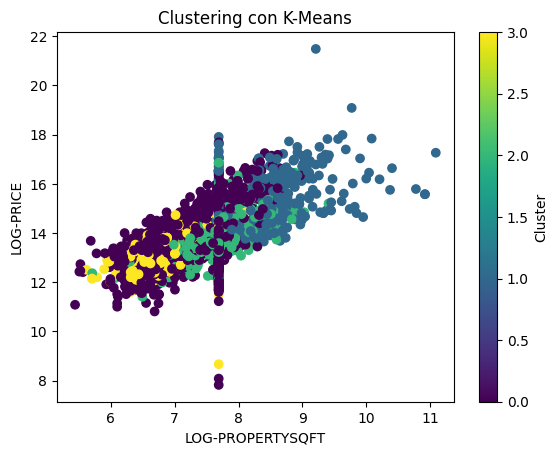

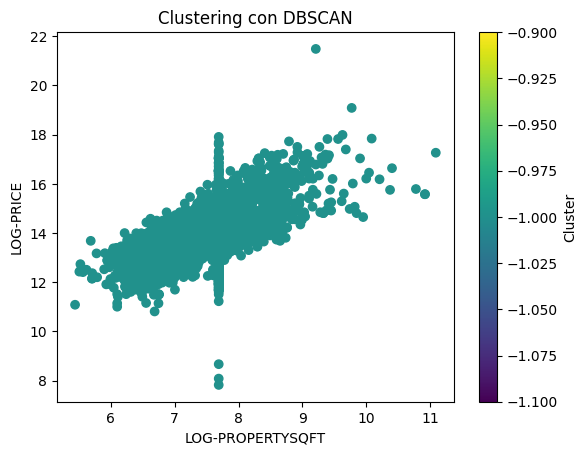

In [113]:
# Codificación One-Hot para variables categóricas
categorical_columns = ['BROKERTITLE', 'TYPE', 'STATE', 'LOCALITY', 'SUBLOCALITY']
data_encoded = pd.get_dummies(data[categorical_columns], drop_first=True)

from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas para una variable ordenada (si existe)
label_encoder = LabelEncoder()
data['STATE_encoded'] = label_encoder.fit_transform(data['STATE'])

from sklearn.preprocessing import StandardScaler

# Seleccionar las variables numéricas para normalizar
numerical_columns = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']

# Normalizar las variables numéricas
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])

# Unir las variables numéricas escaladas y las variables cualitativas codificadas
data_final = pd.concat([pd.DataFrame(data_scaled, columns=numerical_columns), data_encoded], axis=1)

from sklearn.cluster import KMeans

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Ajusta el número de clusters
data['Cluster_KMeans'] = kmeans.fit_predict(data_final)

# Visualizar los resultados
plt.scatter(num_data['LOG-PROPERTYSQFT'], num_data['LOG-PRICE'], c=data['Cluster_KMeans'], cmap='viridis', marker='o')
plt.title('Clustering con K-Means')
plt.xlabel('LOG-PROPERTYSQFT')
plt.ylabel('LOG-PRICE')
plt.colorbar(label='Cluster')
plt.show()

from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
data['Cluster_DBSCAN'] = dbscan.fit_predict(data_final)

# Visualizar los resultados
plt.scatter(num_data['LOG-PROPERTYSQFT'], num_data['LOG-PRICE'], c=data['Cluster_DBSCAN'], cmap='viridis', marker='o')
plt.title('Clustering con DBSCAN')
plt.xlabel('LOG-PROPERTYSQFT')
plt.ylabel('LOG-PRICE')
plt.colorbar(label='Cluster')
plt.show()


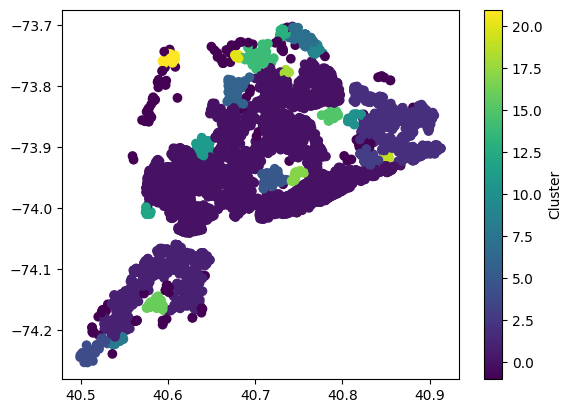

In [88]:
# CLUSTERING 

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

coordinates = num_data[['LONGITUDE','LATITUDE']]

# Normalize data 
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coordinates)

# DBSCAN
dbscan = DBSCAN(eps=0.1,min_samples=10)
num_data['GEO-CLUSTER'] = dbscan.fit_predict(coords_scaled)

# GRAPH 
plt.scatter(num_data['LATITUDE'],num_data['LONGITUDE'],c=num_data['GEO-CLUSTER'],cmap='viridis',marker='o')
plt.colorbar(label='Cluster')
plt.show()

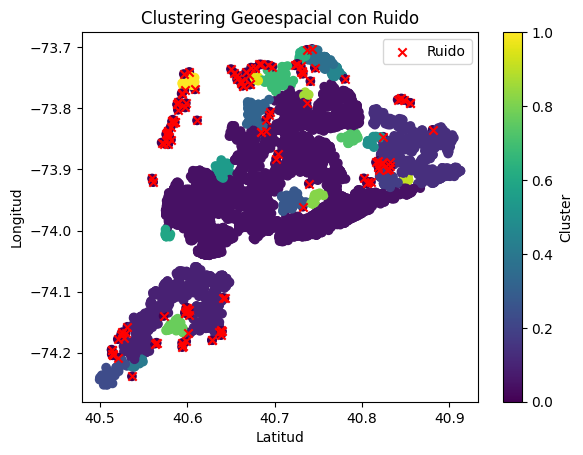

In [94]:
# Visualizar el ruido (etiquetados como -1)
plt.scatter(data['LATITUDE'], data['LONGITUDE'], c=num_data['GEO-CLUSTER'], cmap='viridis', marker='o')

# Resaltar puntos de ruido (etiquetados como -1)
plt.scatter(num_data[num_data['GEO-CLUSTER'] == -1]['LATITUDE'], num_data[num_data['GEO-CLUSTER'] == -1]['LONGITUDE'], 
            color='red', label='Ruido', marker='x')  # Puntos de ruido en rojo

plt.colorbar(label='Cluster')
plt.title('Clustering Geoespacial con Ruido')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.legend()
plt.show()


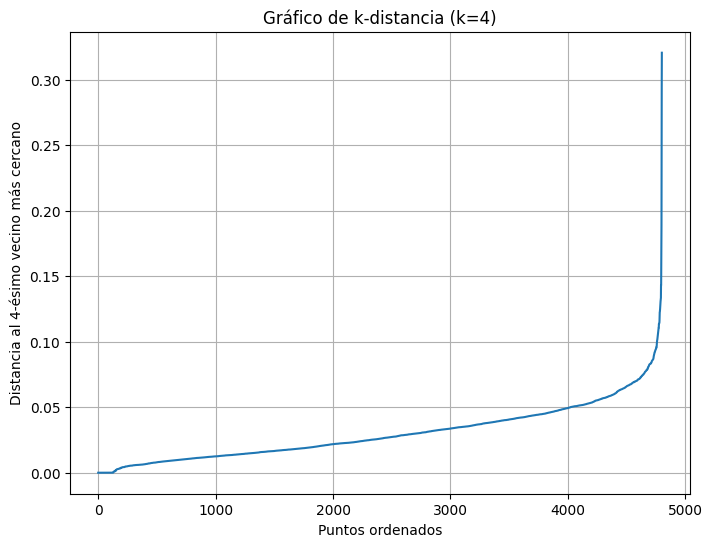

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Selecciona las coordenadas (por ejemplo, 'LATITUDE' y 'LONGITUDE')
coords = data[['LATITUDE', 'LONGITUDE']]

# Ajustar los datos (si es necesario)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Calcular la distancia a los k vecinos más cercanos (por ejemplo, k=4)
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(coords_scaled)

# Obtener las distancias al k-ésimo vecino más cercano
distances, indices = neighbors.kneighbors(coords_scaled)

# Ordenar las distancias (distancia al k-ésimo vecino más cercano)
distances = np.sort(distances[:, k-1], axis=0)

# Graficar el gráfico de k-distancia
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title(f'Gráfico de k-distancia (k={k})')
plt.xlabel('Puntos ordenados')
plt.ylabel(f'Distancia al {k}-ésimo vecino más cercano')
plt.grid(True)
plt.show()


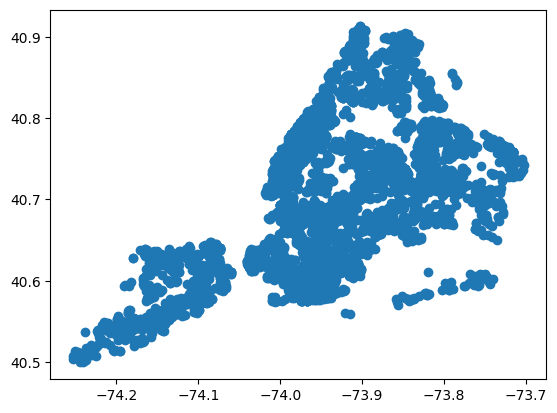

In [40]:
import matplotlib.pyplot as plt 

plt.scatter(num_data['LONGITUDE'],num_data['LATITUDE'])
#plt.yscale('log')
plt.show()

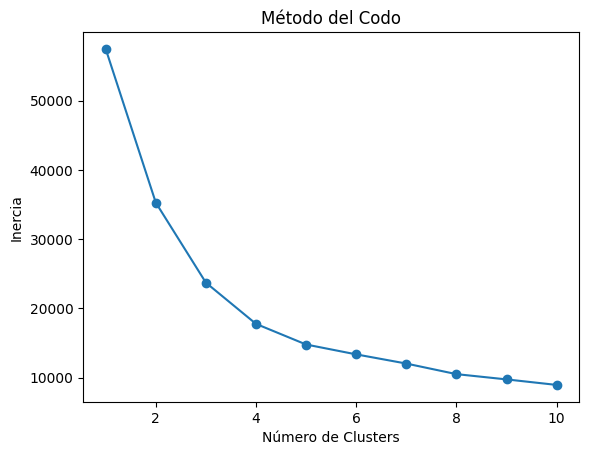

In [95]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecciona las variables para el clustering (puedes usar LATITUDE y LONGITUDE o características como PRICE y BEDS)
X = num_data[['LOG-PRICE', 'LOG-PROPERTYSQFT', 'BEDS', 'BATH']]  # Ejemplo con variables relevantes

# Aplicar el método del codo
inertia = []
for k in range(1, 11):  # Probar con diferentes números de clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()


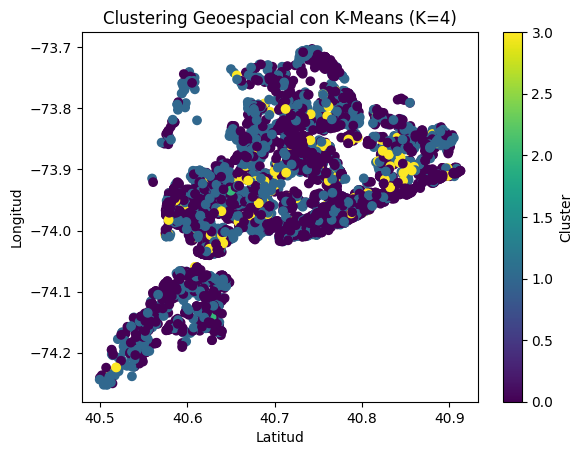

In [96]:
# Aplicar K-Means con el número de clusters elegido
k = 4  # Ajusta este valor según el "codo" encontrado
kmeans = KMeans(n_clusters=k, random_state=42)
num_data['Cluster'] = kmeans.fit_predict(X)

# Visualizar los resultados
plt.scatter(num_data['LATITUDE'], num_data['LONGITUDE'], c=num_data['Cluster'], cmap='viridis', marker='o')
plt.title(f'Clustering Geoespacial con K-Means (K={k})')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.colorbar(label='Cluster')
plt.show()


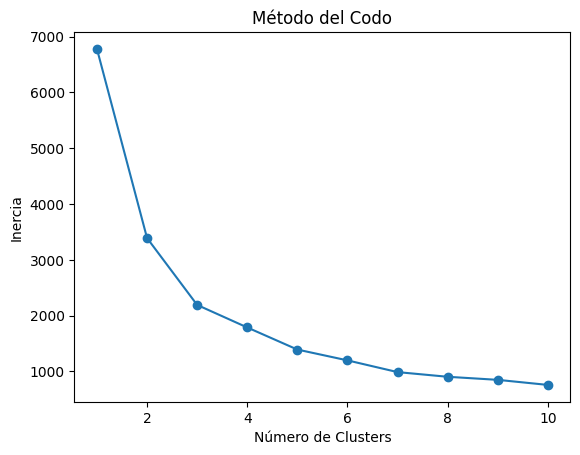

In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar las dos variables para el clustering
X = num_data[['LOG-PROPERTYSQFT', 'LOG-PRICE']]

# Aplicar el método del codo
inertia = []
for k in range(1, 11):  # Probar con diferentes números de clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()


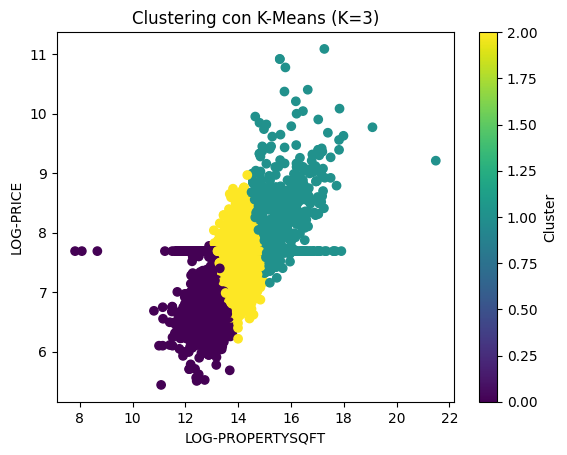

In [105]:
# Aplicar K-Means con el número de clusters elegido (ajusta K según el codo)
k = 3  # Ajusta este valor según lo que obtuviste del gráfico del codo
kmeans = KMeans(n_clusters=k, random_state=42)
num_data['Cluster'] = kmeans.fit_predict(X)

# Visualizar los resultados
plt.scatter(num_data['LOG-PRICE'], num_data['LOG-PROPERTYSQFT'], c=num_data['Cluster'], cmap='viridis', marker='o')
plt.title(f'Clustering con K-Means (K={k})')
plt.xlabel('LOG-PROPERTYSQFT')
plt.ylabel('LOG-PRICE')
plt.colorbar(label='Cluster')
plt.show()


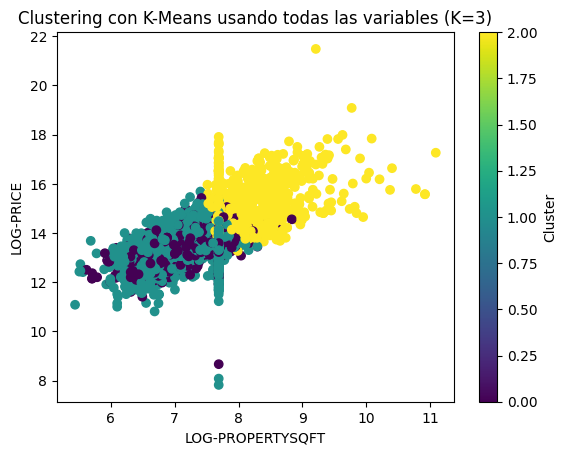

In [108]:
# Seleccionar las variables para el clustering (por ejemplo, todas las numéricas)
X_all = num_data[['LOG-PROPERTYSQFT', 'LOG-PRICE', 'BEDS', 'BATH', 'LATITUDE', 'LONGITUDE']]

# Normalizar las variables
scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X_all)

# Aplicar K-Means
kmeans_all = KMeans(n_clusters=3, random_state=42)
num_data['Cluster_All_Variables'] = kmeans_all.fit_predict(X_scaled_all)

# Visualizar los resultados
plt.scatter(num_data['LOG-PROPERTYSQFT'], num_data['LOG-PRICE'], c=num_data['Cluster_All_Variables'], cmap='viridis', marker='o')
plt.title(f'Clustering con K-Means usando todas las variables (K=3)')
plt.xlabel('LOG-PROPERTYSQFT')
plt.ylabel('LOG-PRICE')
plt.colorbar(label='Cluster')
plt.show()


In [107]:
from sklearn.metrics import silhouette_score

# Calcular el índice de silueta para el clustering con K-Means
silhouette_avg = silhouette_score(X_scaled, num_data['Cluster'])
print(f'Índice de silueta: {silhouette_avg}')

# Inercia en K-Means (distancia total dentro de los clusters)
print(f'Inercia: {kmeans.inertia_}')



Índice de silueta: 0.34890196752057573
Inercia: 2192.0966452680095


In [103]:
from sklearn.preprocessing import StandardScaler

# Selecciona las variables para el clustering
X = num_data[['LOG-PROPERTYSQFT', 'LOG-PRICE']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


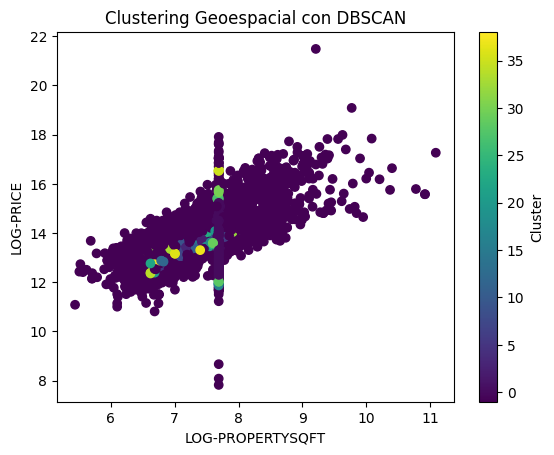

In [104]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=10)  # Ajusta `eps` y `min_samples` según tus datos
num_data['GeoCluster'] = dbscan.fit_predict(X_scaled)

# Visualizar los clusters
plt.scatter(num_data['LOG-PROPERTYSQFT'], num_data['LOG-PRICE'], c=num_data['GeoCluster'], cmap='viridis', marker='o')
plt.title('Clustering Geoespacial con DBSCAN')
plt.xlabel('LOG-PROPERTYSQFT')
plt.ylabel('LOG-PRICE')
plt.colorbar(label='Cluster')
plt.show()


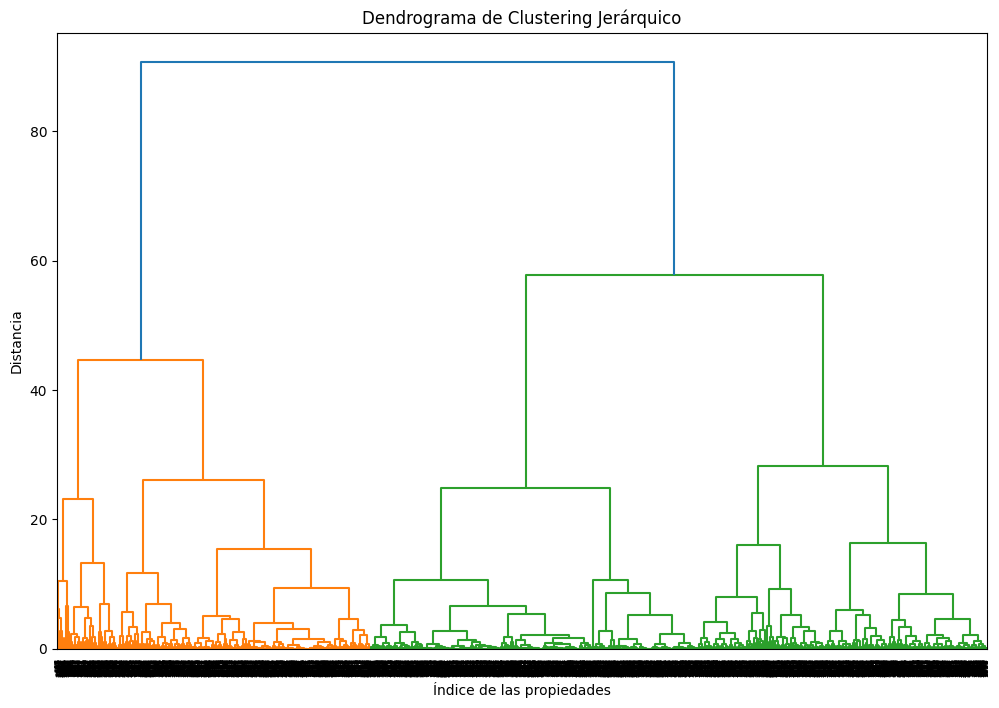

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Seleccionar las variables para el clustering
X = num_data[['LOG-PROPERTYSQFT', 'LOG-PRICE']]

# Normalizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar el linkage para el clustering jerárquico
Z = linkage(X_scaled, method='ward')  # Puedes cambiar 'ward' por 'complete' o 'average'

# Crear el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice de las propiedades')
plt.ylabel('Distancia')
plt.show()


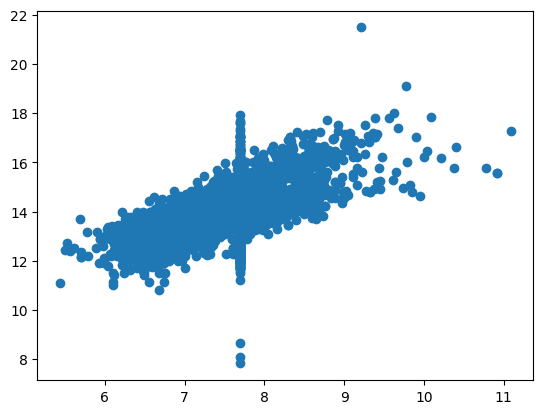

In [34]:
import matplotlib.pyplot as plt 

plt.scatter(num_data['LOG-PROPERTYSQFT'],num_data['LOG-PRICE'])
#plt.yscale('log')
plt.show()